In [80]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose 
import seaborn as sns 


In [81]:
# get the name of the csv file 
file = r'D:\karir\Data Analyst\dataset\Air-quality-dataset\PRSA_Data_20130301-20170228\PRSA_Data_Changping_20130301-20170228.csv'

# read the csv file into a pandas DataFrame using the pd.read_csv()
airquality_df  = pd.read_csv(file)
airquality_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [82]:
# drop the unwanted columns/features
cols_to_drop = ['No','station','wd']
airquality_df = airquality_df.drop(cols_to_drop,axis=1)
airquality_df.head()


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,0.5
1,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,0.7
2,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,0.2
3,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,1.0
4,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,2.1


In [83]:
# Combine date and time columns into a datetime column
airquality_df['datetime'] = pd.to_datetime(airquality_df[['year', 'month', 'day', 'hour']])
airquality_df.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,datetime
0,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,0.5,2013-03-01 00:00:00
1,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,0.7,2013-03-01 01:00:00
2,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,0.2,2013-03-01 02:00:00
3,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,1.0,2013-03-01 03:00:00
4,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,2.1,2013-03-01 04:00:00


In [84]:
#menilai data airquality_df
airquality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   year      35064 non-null  int64         
 1   month     35064 non-null  int64         
 2   day       35064 non-null  int64         
 3   hour      35064 non-null  int64         
 4   PM2.5     34290 non-null  float64       
 5   PM10      34482 non-null  float64       
 6   SO2       34436 non-null  float64       
 7   NO2       34397 non-null  float64       
 8   CO        33543 non-null  float64       
 9   O3        34460 non-null  float64       
 10  TEMP      35011 non-null  float64       
 11  PRES      35014 non-null  float64       
 12  DEWP      35011 non-null  float64       
 13  RAIN      35013 non-null  float64       
 14  WSPM      35021 non-null  float64       
 15  datetime  35064 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(11), int64(4)
memory usage: 

In [85]:
airquality_df.isna().sum()

year           0
month          0
day            0
hour           0
PM2.5        774
PM10         582
SO2          628
NO2          667
CO          1521
O3           604
TEMP          53
PRES          50
DEWP          53
RAIN          51
WSPM          43
datetime       0
dtype: int64

In [86]:
#hampir di semua kolom table memiliki missing value.cleaning datanya menggunakan metode interpolasi
df = airquality_df.interpolate()
print (df)


       year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0      2013      3    1     0    3.0   6.0  13.0   7.0  300.0  85.0  -2.3   
1      2013      3    1     1    3.0   3.0   6.0   6.0  300.0  85.0  -2.5   
2      2013      3    1     2    3.0   3.0  22.0  13.0  400.0  74.0  -3.0   
3      2013      3    1     3    3.0   6.0  12.0   8.0  300.0  81.0  -3.6   
4      2013      3    1     4    3.0   3.0  14.0   8.0  300.0  81.0  -3.5   
...     ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   ...   
35059  2017      2   28    19   28.0  47.0   4.0  14.0  300.0  33.0  11.7   
35060  2017      2   28    20   12.0  12.0   3.0  23.0  500.0  64.0  10.9   
35061  2017      2   28    21    7.0  23.0   5.0  17.0  500.0  68.0   9.5   
35062  2017      2   28    22   11.0  20.0   3.0  15.0  500.0  72.0   7.8   
35063  2017      2   28    23   20.0  25.0   6.0  28.0  900.0  54.0   7.0   

         PRES  DEWP  RAIN  WSPM            datetime  
0      1020.8 -19.7  

In [96]:
df.isna().sum()

year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
WSPM        0
datetime    0
dtype: int64

In [88]:
daily_data = df.groupby(df['datetime'].dt.date).mean()


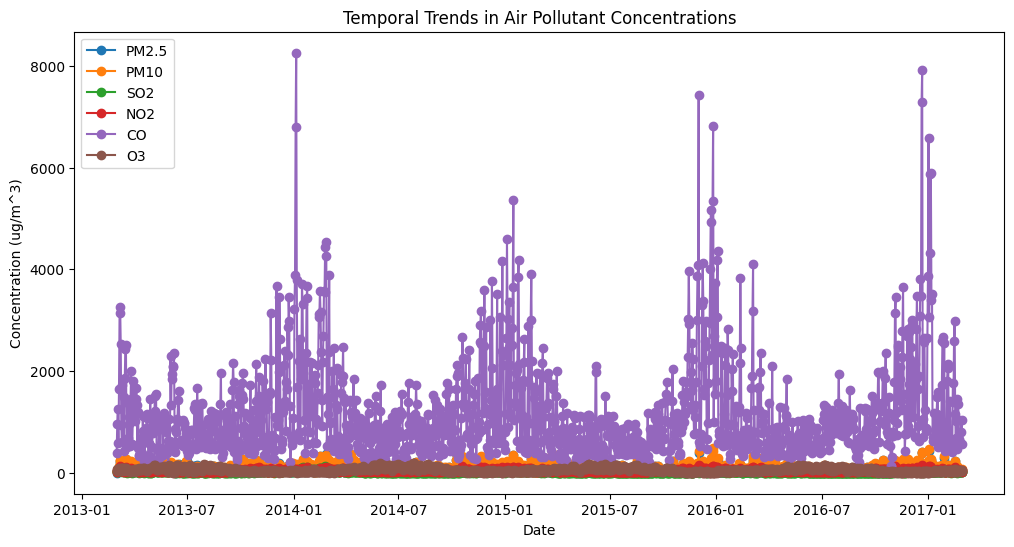

In [89]:
plt.figure(figsize=(12, 6))

plt.plot(daily_data['datetime'], daily_data['PM2.5'], label='PM2.5', marker='o')
plt.plot(daily_data['datetime'], daily_data['PM10'], label='PM10', marker='o')
plt.plot(daily_data['datetime'], daily_data['SO2'], label='SO2', marker='o')
plt.plot(daily_data['datetime'], daily_data['NO2'], label='NO2', marker='o')
plt.plot(daily_data['datetime'], daily_data['CO'], label='CO', marker='o')
plt.plot(daily_data['datetime'], daily_data['O3'], label='O3', marker='o')

plt.xlabel('Date')
plt.ylabel('Concentration (ug/m^3)')
plt.title('Temporal Trends in Air Pollutant Concentrations')
plt.legend()
plt.show()

In [90]:
monthly_data = df.resample('M', on='datetime').mean()

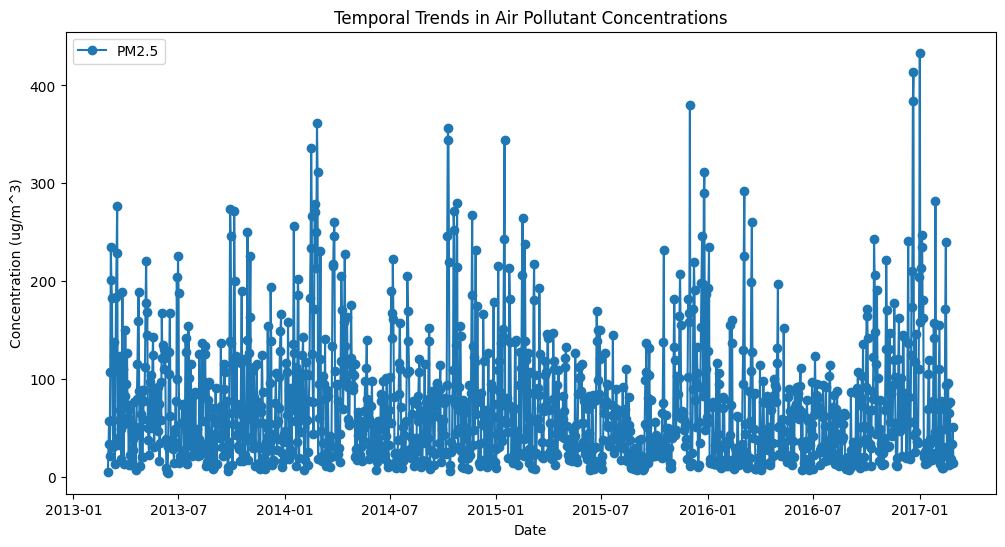

In [91]:
plt.figure(figsize=(12, 6))

plt.plot(daily_data['datetime'], daily_data['PM2.5'], label='PM2.5', marker='o')


plt.xlabel('Date')
plt.ylabel('Concentration (ug/m^3)')
plt.title('Temporal Trends in Air Pollutant Concentrations')
plt.legend()
plt.show()

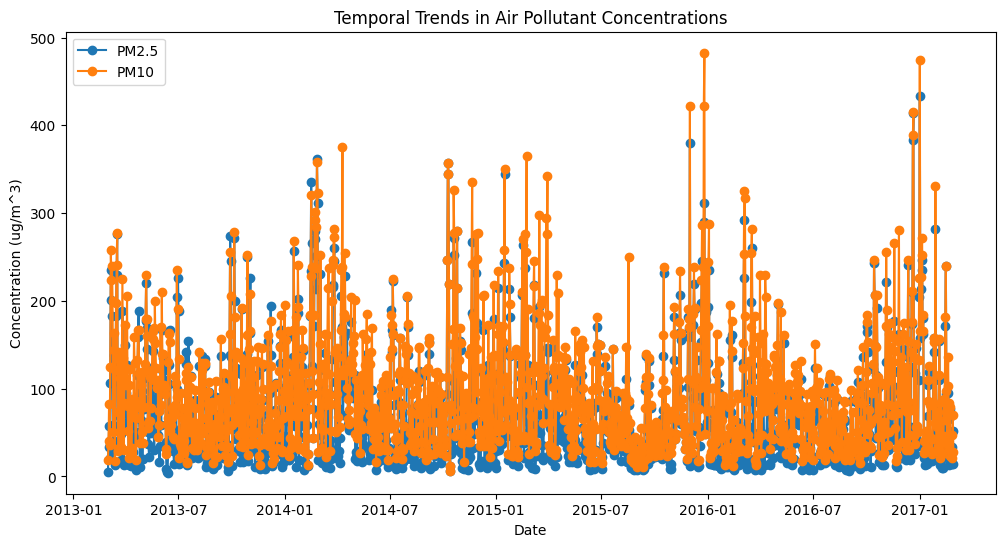

In [92]:
plt.figure(figsize=(12, 6))

plt.plot(daily_data['datetime'], daily_data['PM2.5'], label='PM2.5', marker='o')
plt.plot(daily_data['datetime'], daily_data['PM10'], label='PM10', marker='o')

plt.xlabel('Date')
plt.ylabel('Concentration (ug/m^3)')
plt.title('Temporal Trends in Air Pollutant Concentrations')
plt.legend()
plt.show()

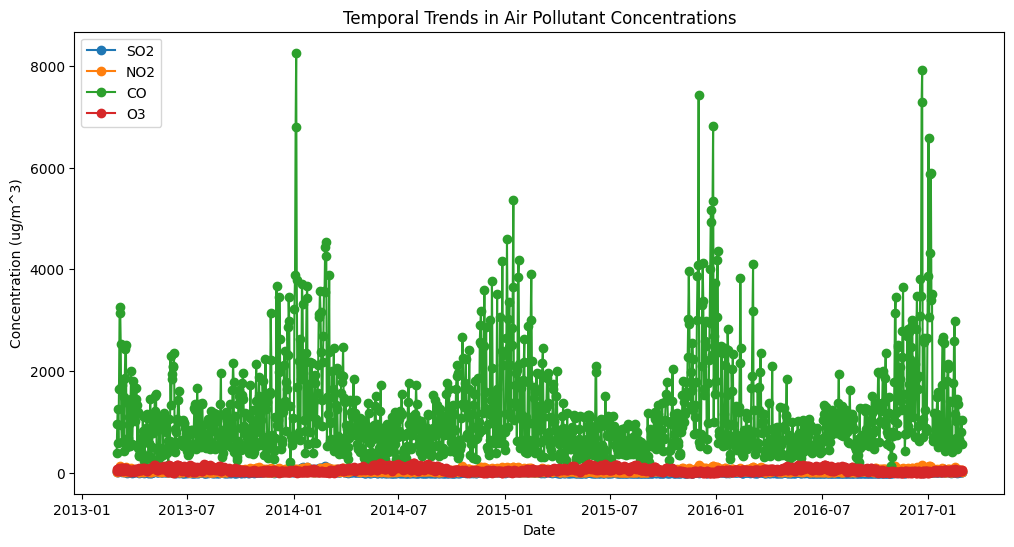

In [93]:
plt.figure(figsize=(12, 6))


plt.plot(daily_data['datetime'], daily_data['SO2'], label='SO2', marker='o')
plt.plot(daily_data['datetime'], daily_data['NO2'], label='NO2', marker='o')
plt.plot(daily_data['datetime'], daily_data['CO'], label='CO', marker='o')
plt.plot(daily_data['datetime'], daily_data['O3'], label='O3', marker='o')

plt.xlabel('Date')
plt.ylabel('Concentration (ug/m^3)')
plt.title('Temporal Trends in Air Pollutant Concentrations')
plt.legend()
plt.show()

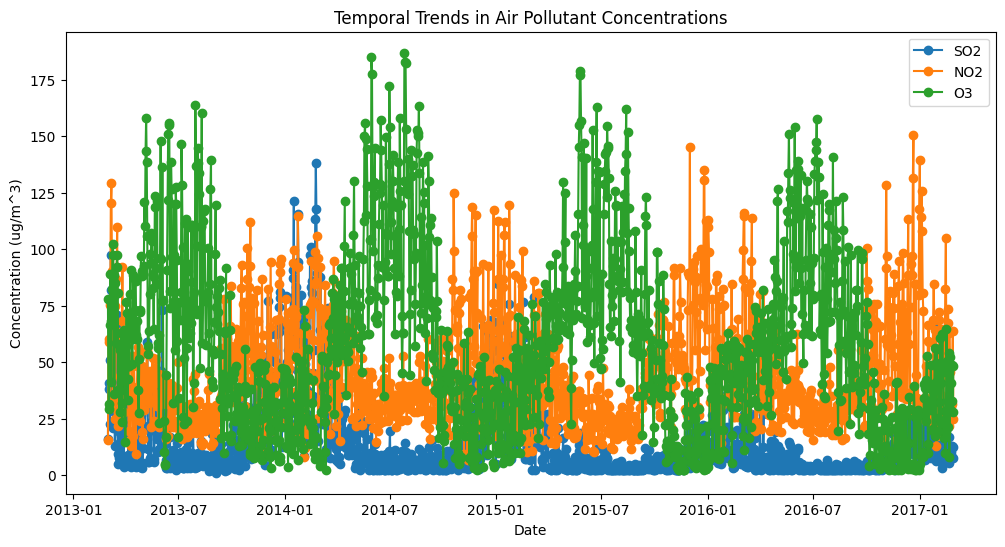

In [94]:
plt.figure(figsize=(12, 6))


plt.plot(daily_data['datetime'], daily_data['SO2'], label='SO2', marker='o')
plt.plot(daily_data['datetime'], daily_data['NO2'], label='NO2', marker='o')
plt.plot(daily_data['datetime'], daily_data['O3'], label='O3', marker='o')

plt.xlabel('Date')
plt.ylabel('Concentration (ug/m^3)')
plt.title('Temporal Trends in Air Pollutant Concentrations')
plt.legend()
plt.show()

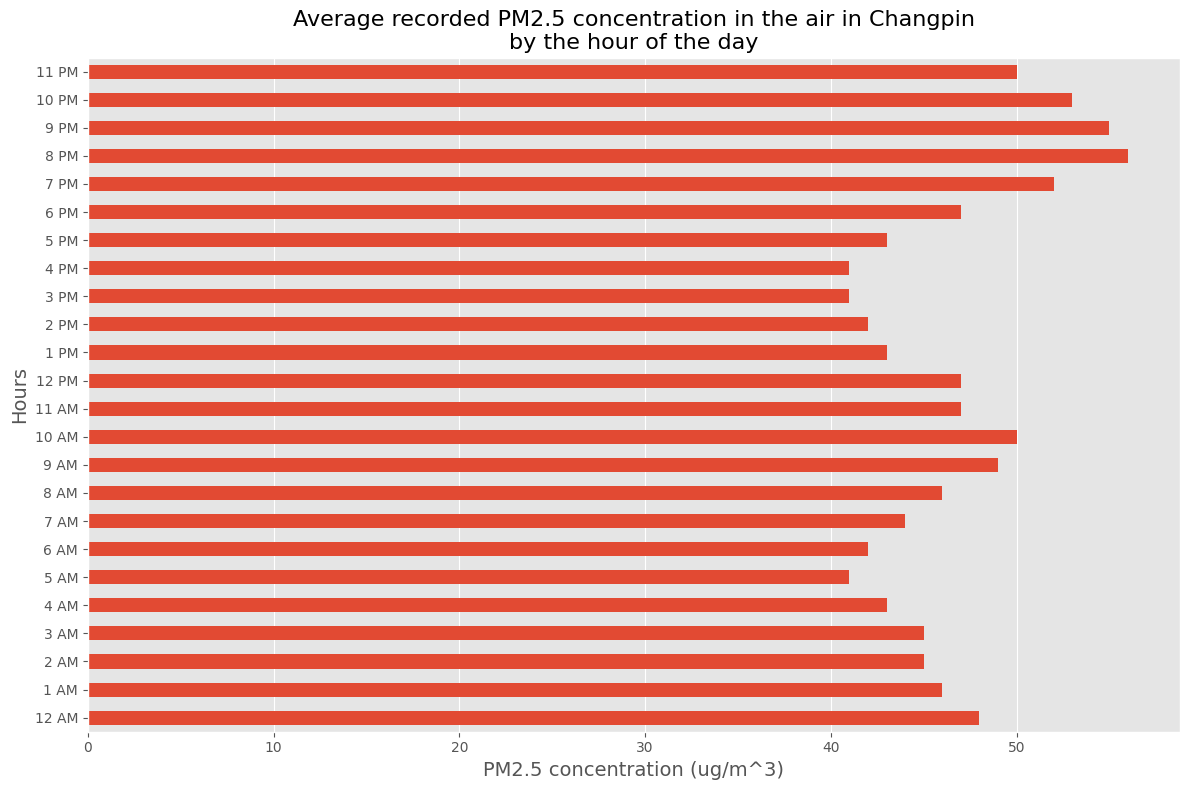

In [98]:
hourly_data = data[['hour','PM2.5']]
hrs = ['12 AM','1 AM','2 AM','3 AM','4 AM','5 AM','6 AM','7 AM','8 AM','9 AM','10 AM',
      '11 AM','12 PM','1 PM','2 PM','3 PM','4 PM','5 PM','6 PM','7 PM',
      '8 PM','9 PM','10 PM','11 PM']
hour_dict = {}
for i,j in enumerate(hrs):
    hour_dict.setdefault(i,j)
    
hourly_data = hourly_data.groupby('hour').median().reset_index()
hourly_data.hour = hourly_data.hour.map(hour_dict)
hourly_data = hourly_data.set_index('hour')

# plot the data
with plt.style.context('ggplot'):
    hourly_data.plot(figsize=(12,8),legend=False,kind='barh',linewidth=.9)
    plt.ylabel('Hours',fontsize=14)
    plt.xlabel('PM2.5 concentration (ug/m^3)',fontsize=14)
    plt.title('Average recorded PM2.5 concentration in the air in Changpin\nby the hour of the day',fontsize=16)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17496\4280679475.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_data.month = monthly_data.month.map(map_dict)


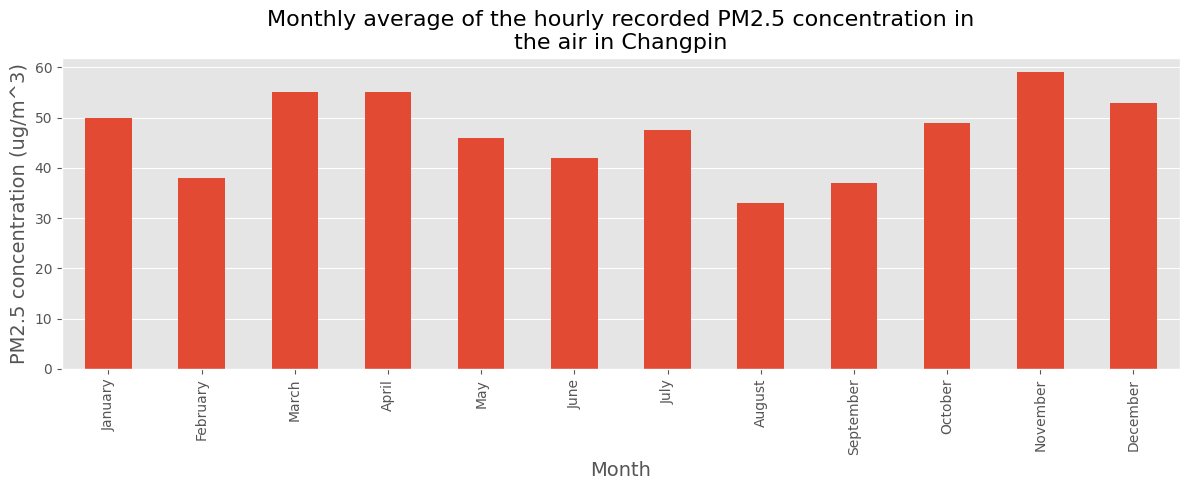

In [100]:
monthly_data = data[['month','PM2.5']]
months = ['January','February','March','April','May','June','July',
         'August','September','October','November','December']
ordered_monthdf = pd.DataFrame(months,columns=['month'])
map_dict = {}
for i,j in enumerate(months):
    map_dict.setdefault(i+1,j)

monthly_data.month = monthly_data.month.map(map_dict)
monthly_average = monthly_data.groupby('month').median()
monthly_average = pd.merge(ordered_monthdf,monthly_average,left_on='month',right_index=True)
monthly_average = np.round(monthly_average,1)
monthly_average = monthly_average.set_index('month')

# plot the data
with plt.style.context('ggplot'):
    monthly_average.plot(figsize=(12,5),legend=False,kind='bar',linewidth=.9)
    plt.xlabel('Month',fontsize=14)
    plt.ylabel('PM2.5 concentration (ug/m^3)',fontsize=14)
    plt.title('Monthly average of the hourly recorded PM2.5 concentration in\nthe air in Changpin',fontsize=16)
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()